In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#데이터셋 불러오기
csv_path = os.getenv("HOME") + "/aiffel/Pokemon/Pokemon.csv" # 대소문자 구분 주의!
original_data = pd.read_csv(csv_path)

#데이터셋 복사 (원본을 훼손하지 않기 위한 조치)
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
#우리가 현재 원하는 속성(Legendary)을 변수에 저장
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop = True) #reset_index(drop = True) --> 인덱스를 재정렬해주는 함수
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [4]:
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop = True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
#결측치 확인
pokemon.isnull().sum()
#타입2에서 386개의 결측치

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
#ID 값
print(len(set(pokemon["#"])))
#총 800개의 데이터중에서 721개의 ID값이 있음
#이는 유일한 값을 가지지 않으며 인덱스로 쓸 수 없음을 의미함
pokemon[pokemon["#"] == 6] #예시

721


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [7]:
#이름
print(len(set(pokemon["Name"])))
#800개가 모두 유일한 겂을 가지므로 인덱스로 사용가능

800


In [8]:
#속성의 종류
print(len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"]))))
#타입 1 18개, 타입 2 19개의 속성을 가지고 있다.

#차집합
print(set(pokemon["Type 2"]) - set(pokemon["Type 1"]))
#{nan}이 타입 2에만 존재하는 속성

18 19
{nan}


In [9]:
#모든 타입을 변수에 저장
types = list(set(pokemon["Type 1"]))
print(types)

['Grass', 'Psychic', 'Ground', 'Poison', 'Fairy', 'Normal', 'Steel', 'Bug', 'Rock', 'Flying', 'Water', 'Electric', 'Ice', 'Dragon', 'Fighting', 'Ghost', 'Fire', 'Dark']


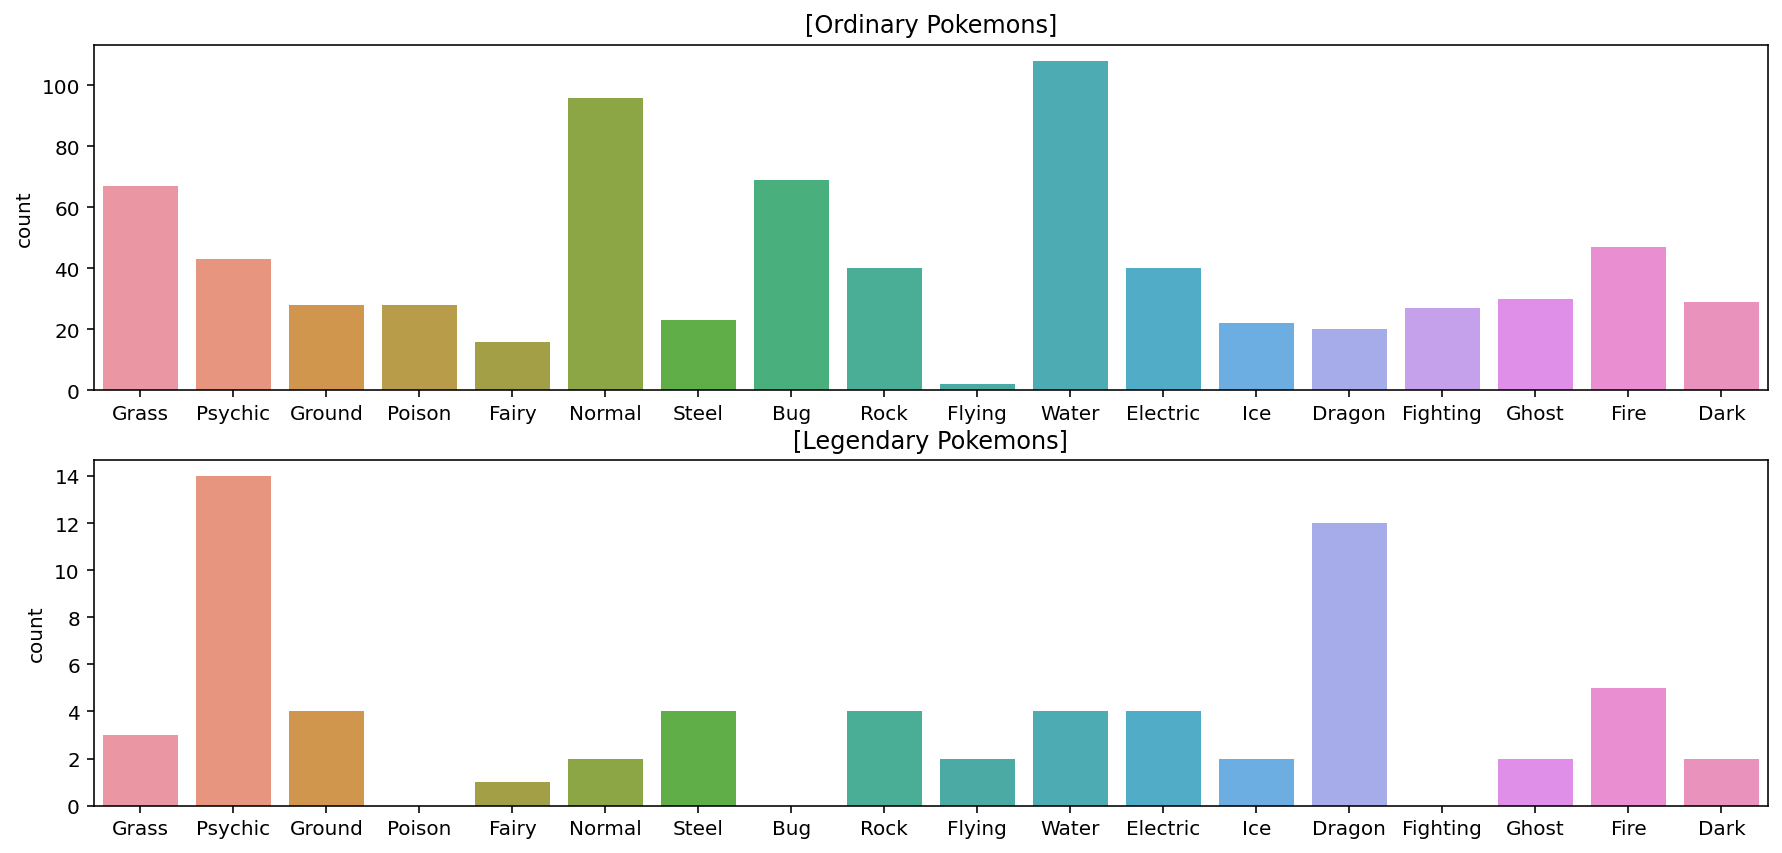

In [10]:
#포켓몬의 데이터 분포
plt.figure(figsize = (15, 7)) #화면 크기

plt.subplot(211)
sns.countplot(data = ordinary, x = "Type 1", order = types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data = legendary, x = "Type 1", order = types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [11]:
#pivot table (속성에서 데이터의 비율을 보여주는 테이블)
pd.pivot_table(pokemon, index = "Type 1", values = "Legendary").sort_values(by = ["Legendary"], ascending = False)
# 비행포켓몬의 반은 전설의 포켓몬?!

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


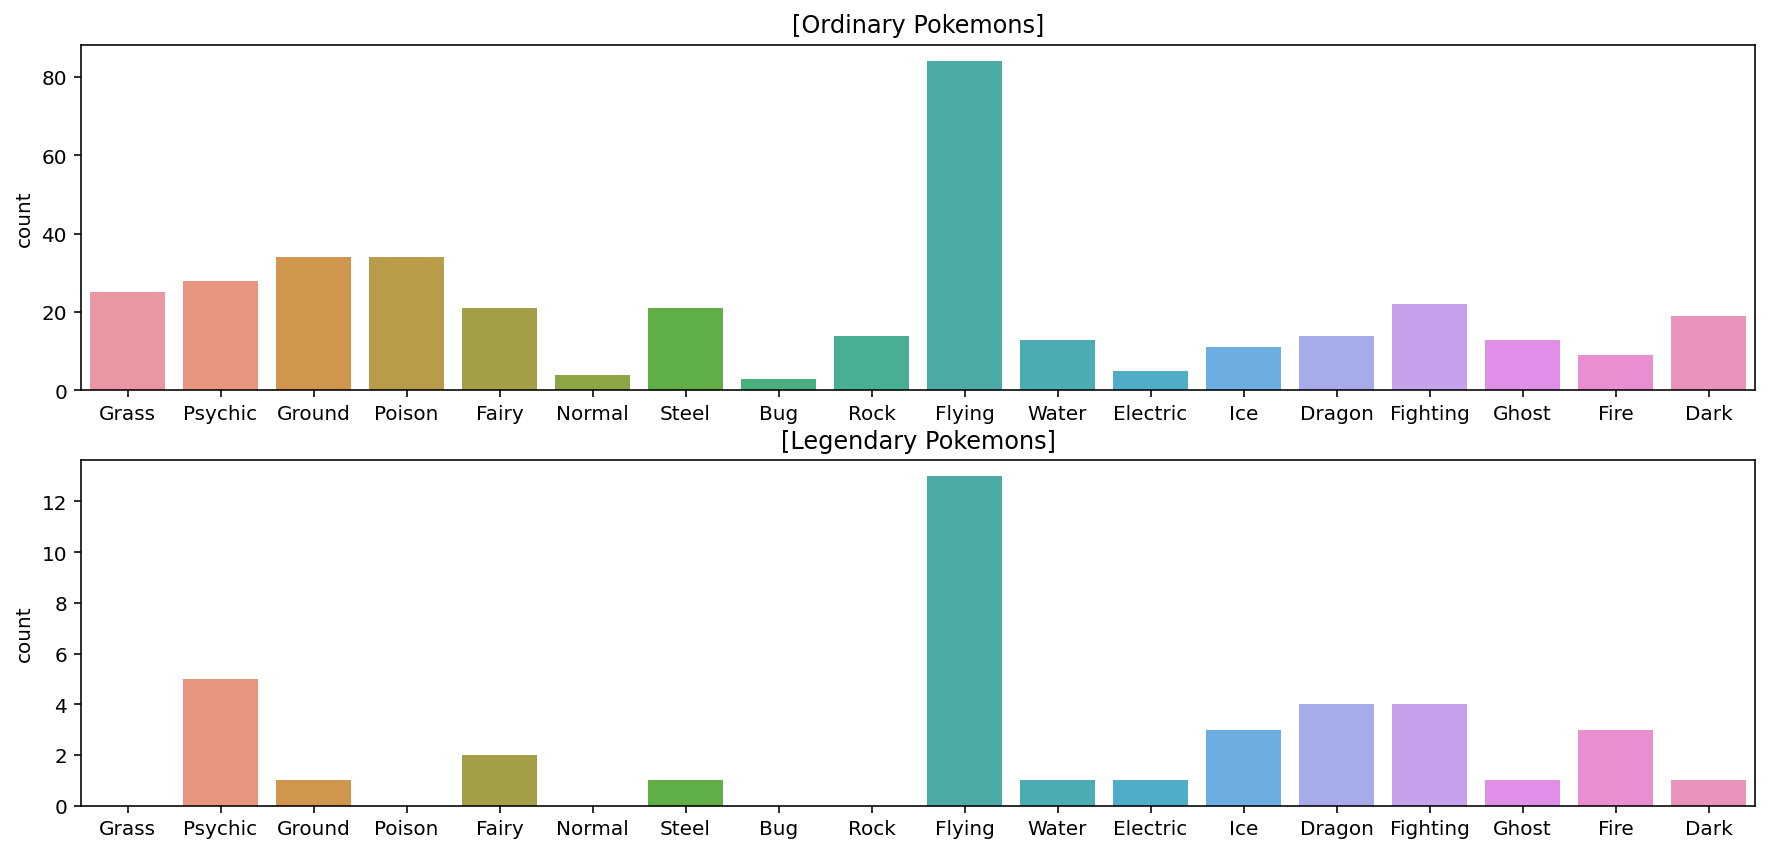

In [12]:
#타입 2의 데이터 분포
plt.figure(figsize=(15, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [13]:
#pivot table (속성에서 데이터의 비율을 보여주는 테이블)
pd.pivot_table(pokemon, index = "Type 2", values = "Legendary").sort_values(by = ["Legendary"], ascending = False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [14]:
#Total
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

# ID 0 의 포켓몬 정보
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#Total값과 stats의 총합이 같은지 비교하고 합한다.
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


800

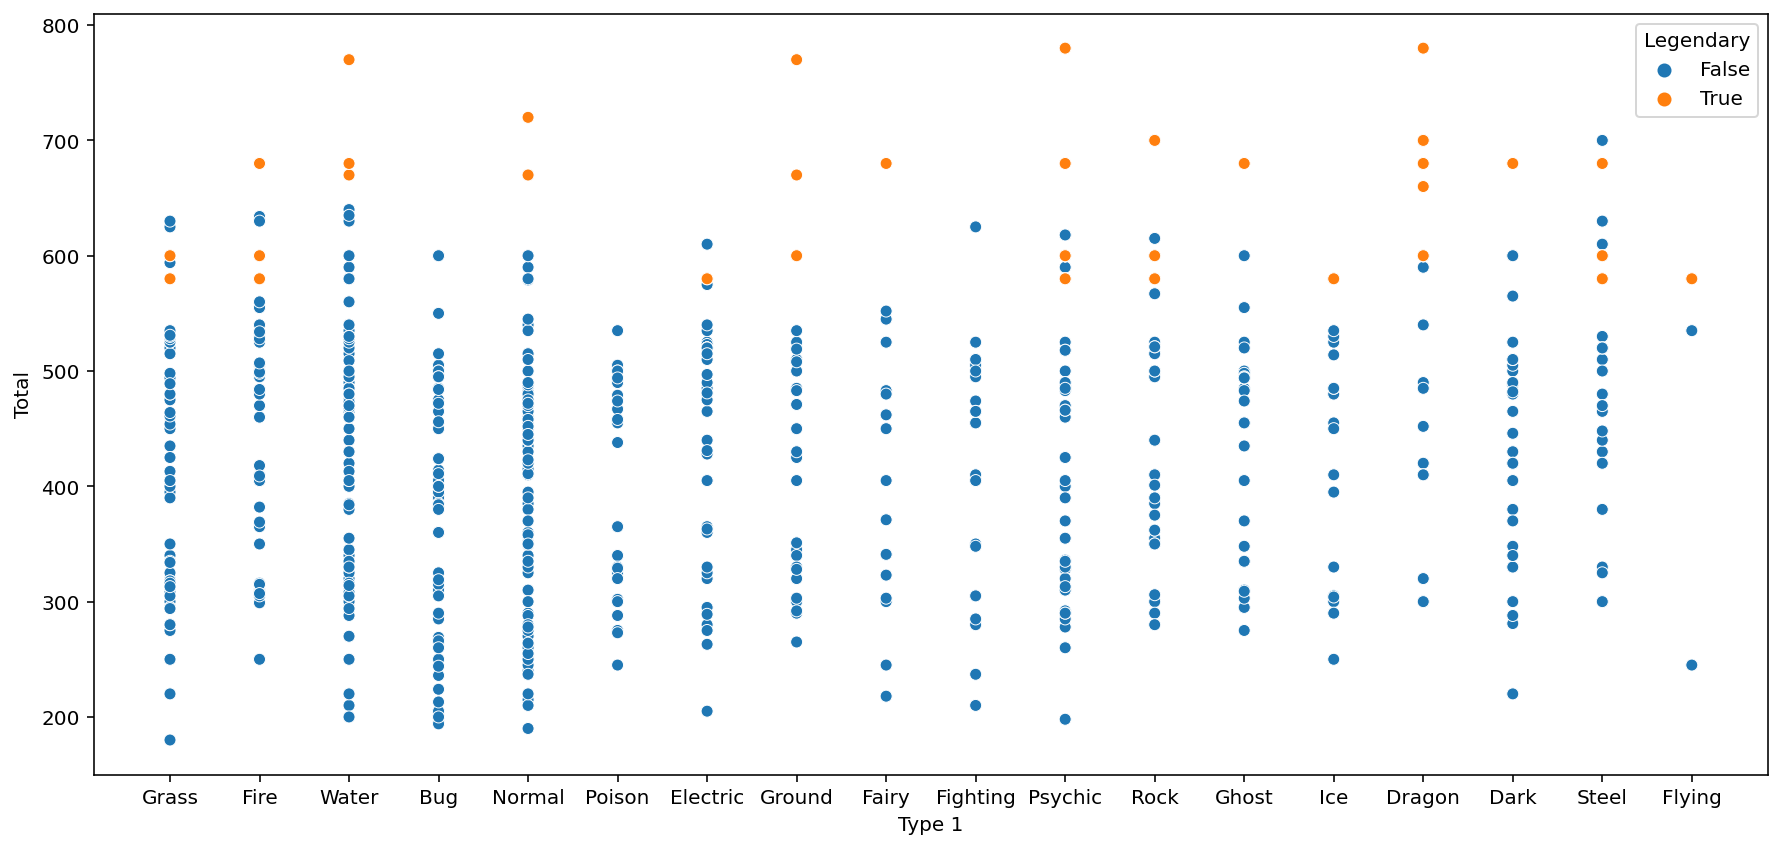

In [15]:
#Total 값에 따른 분포
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

sns.scatterplot(data = pokemon, x = "Type 1", y = "Total", hue = "Legendary")
plt.show()
#금속 포켓몬은 전설포켓몬이 일반 1등보다 스텟이 안 좋네...?

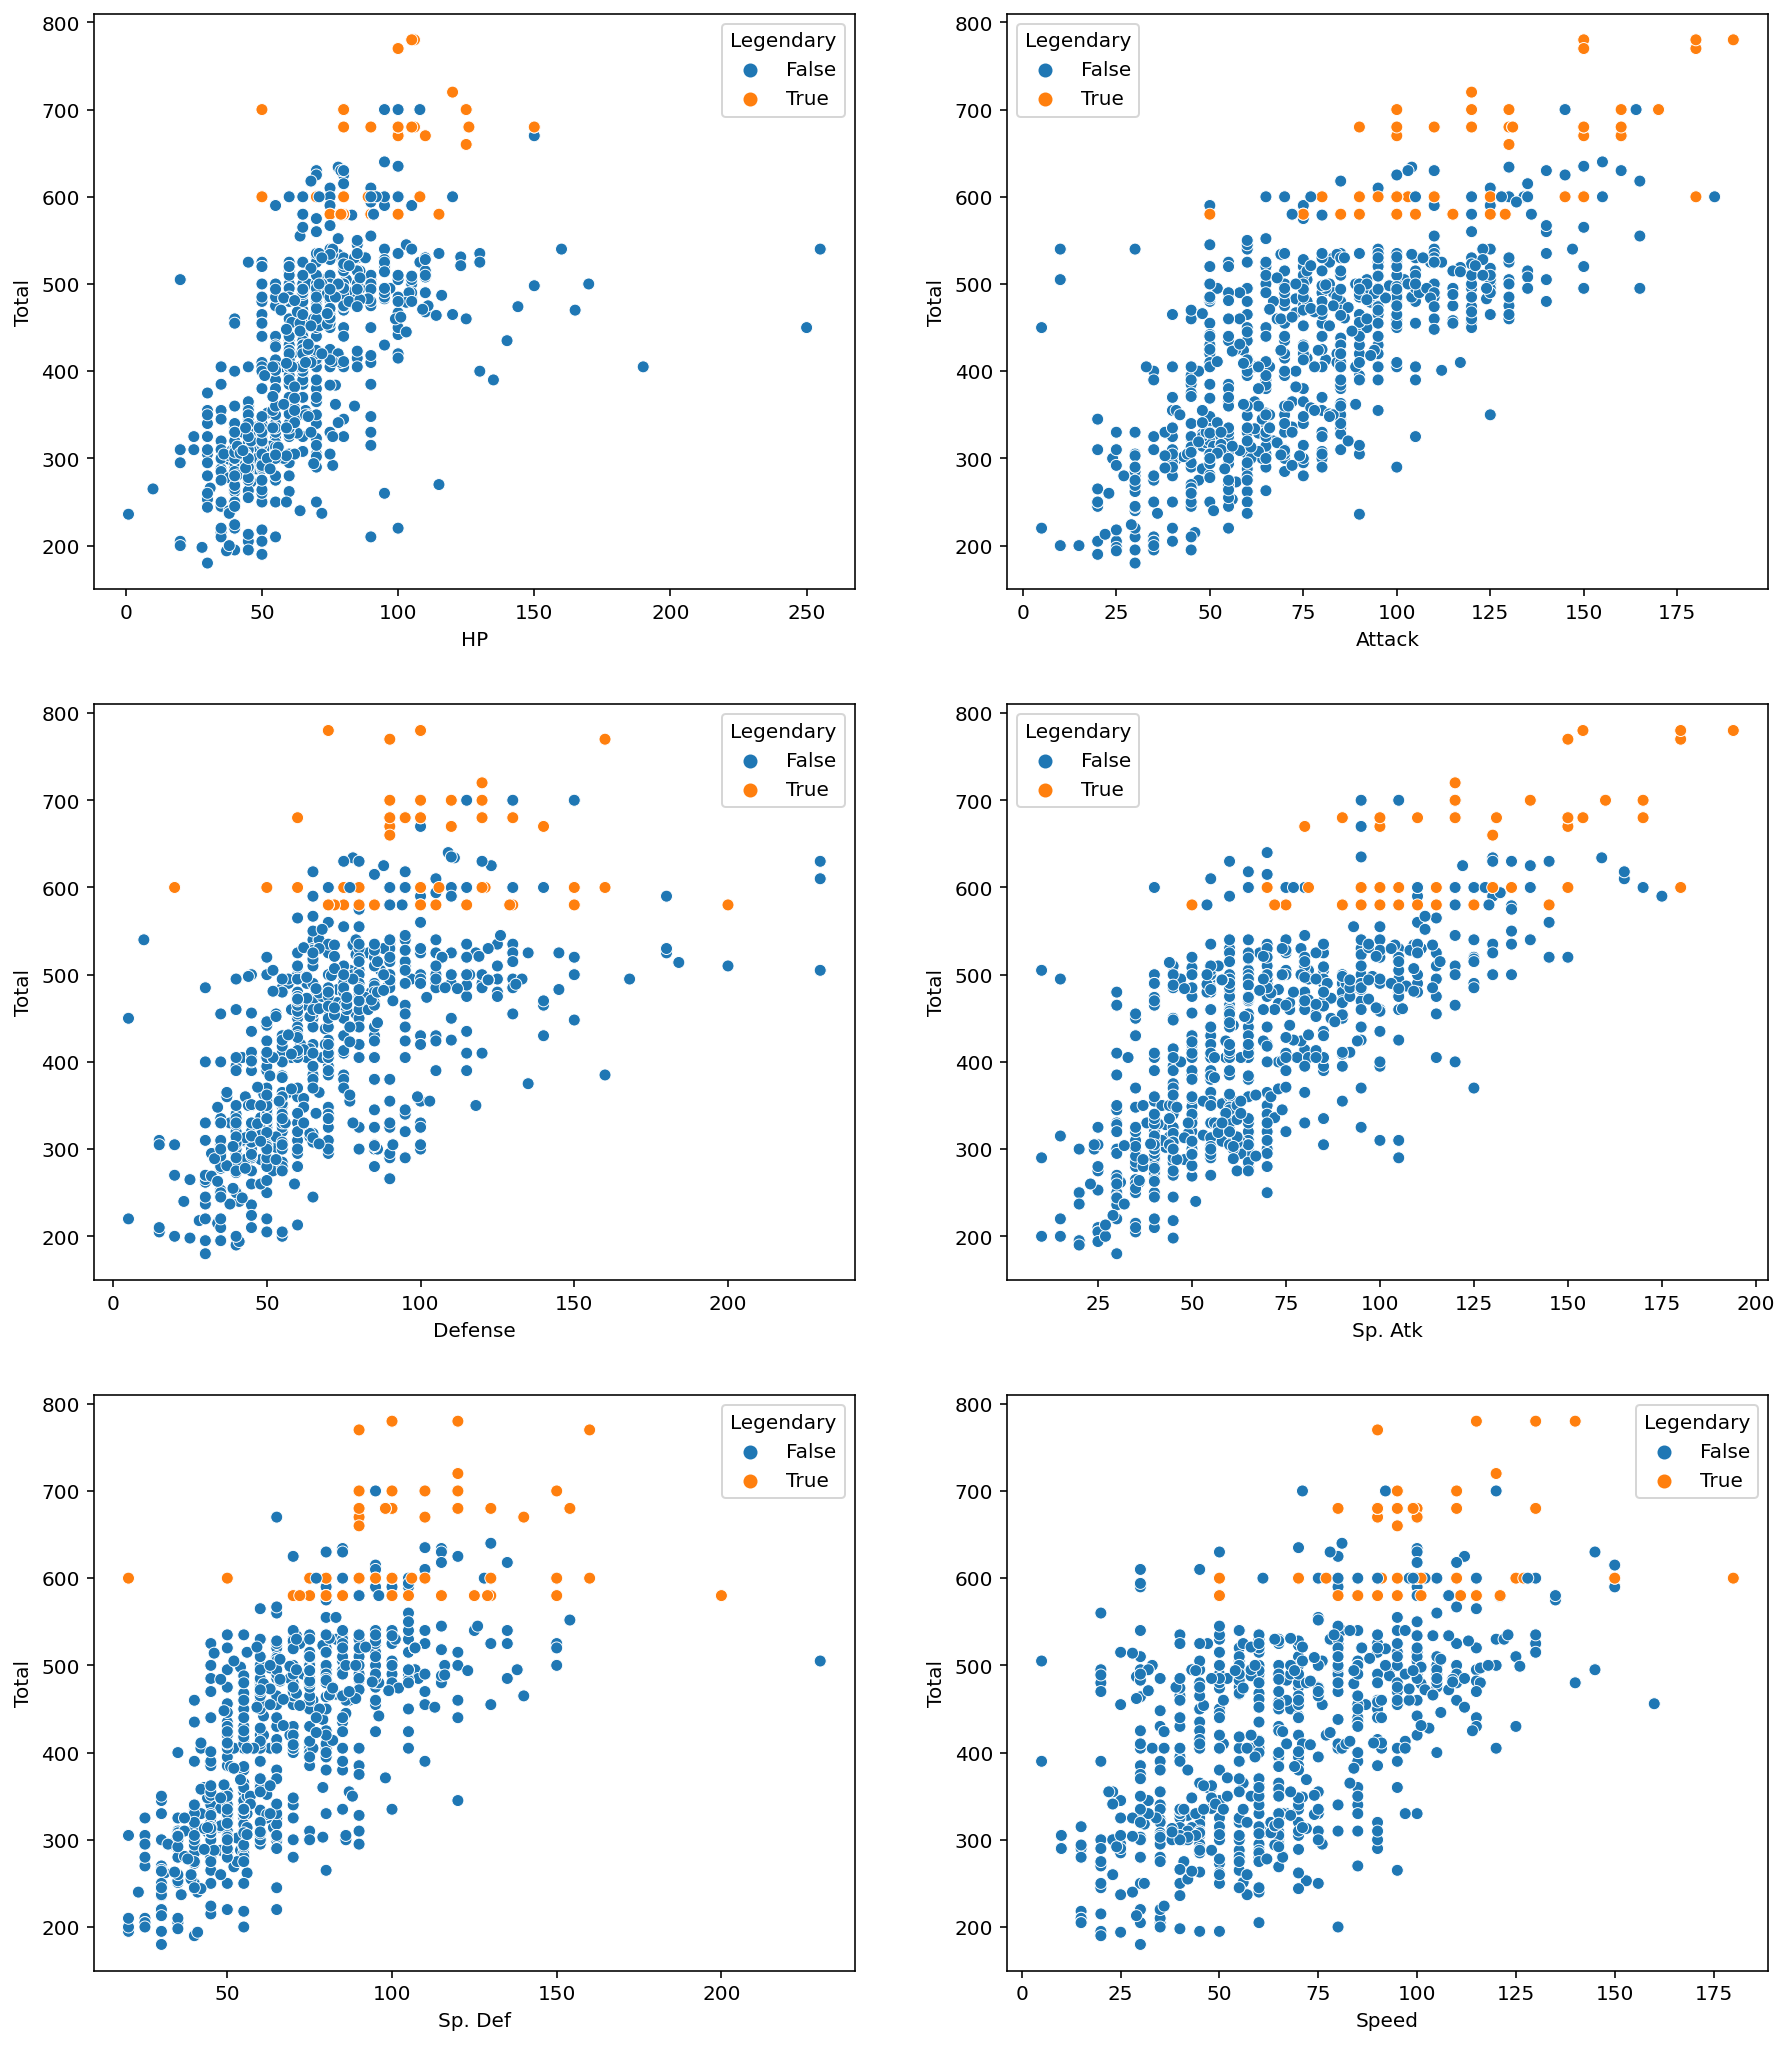

In [16]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 18)  

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

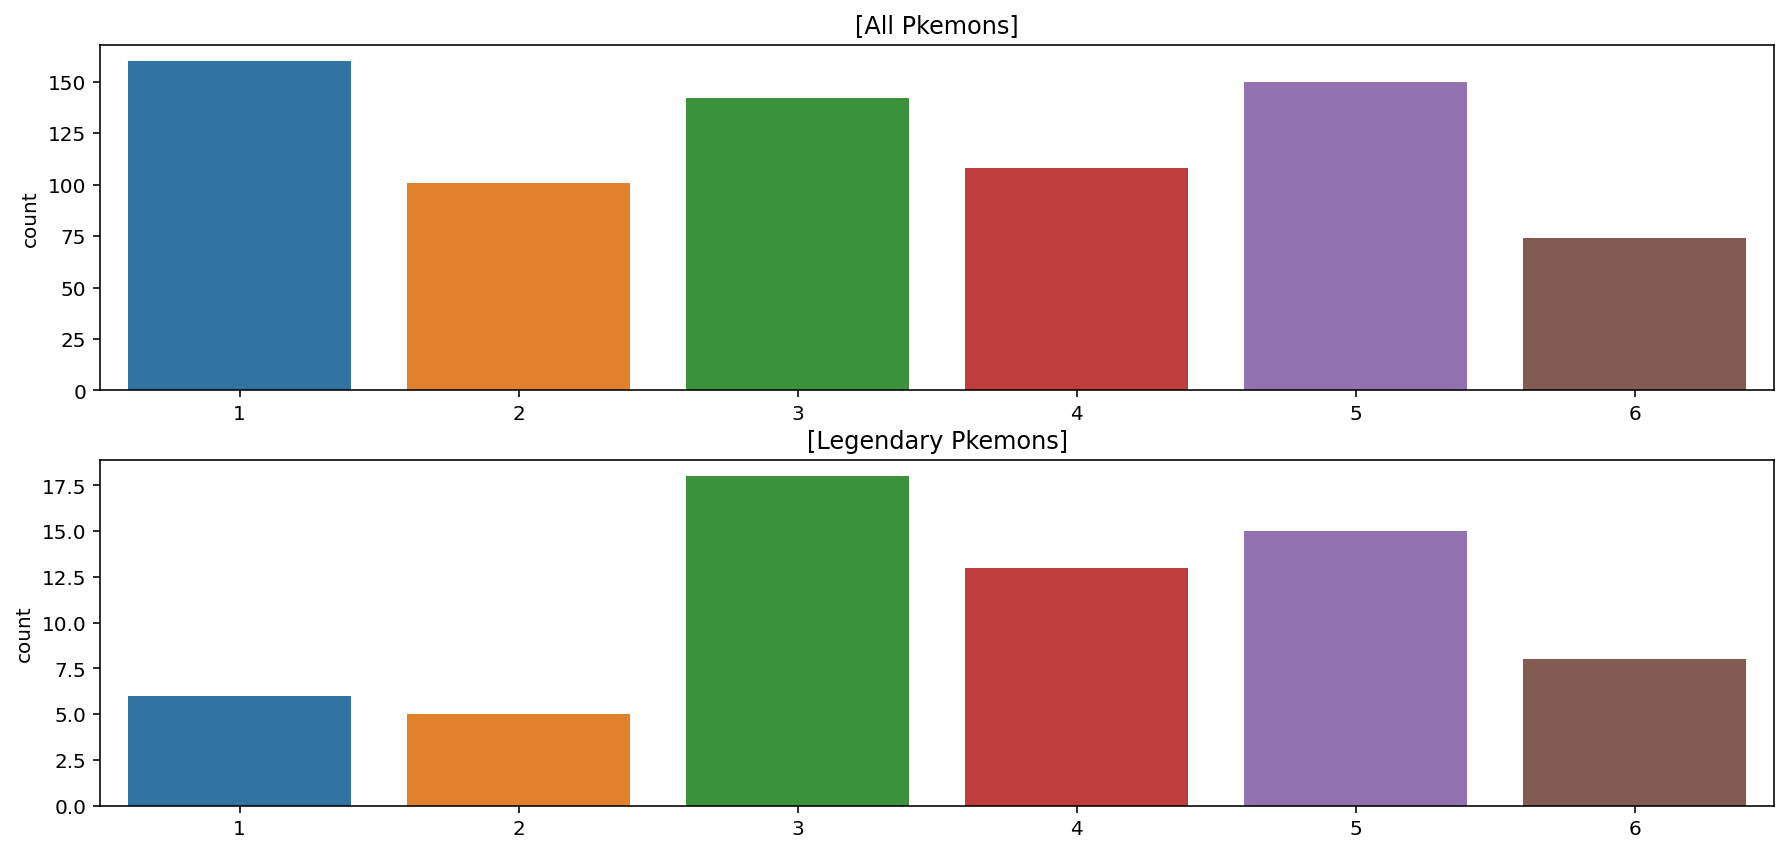

[580, 600, 660, 670, 680, 700, 720, 770, 780]


In [17]:
#Generation 데이터
plt.figure(figsize=(15, 7)) 

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()
#그래프의 수치화
print(sorted(list(set(legendary["Total"])))) #sorted(정렬) list(배열,리스트화) set(데이터셋) ---> legendary의 Total을 데이터셋으로 만들고 리스트화해서 정렬
#1세대와 2세대는 전설포켓몬의 수가 적고 이후 세대는 전설 포켓몬이 늘어났다.
#1, 2세대는 진짜 전설의 포켓몬이네

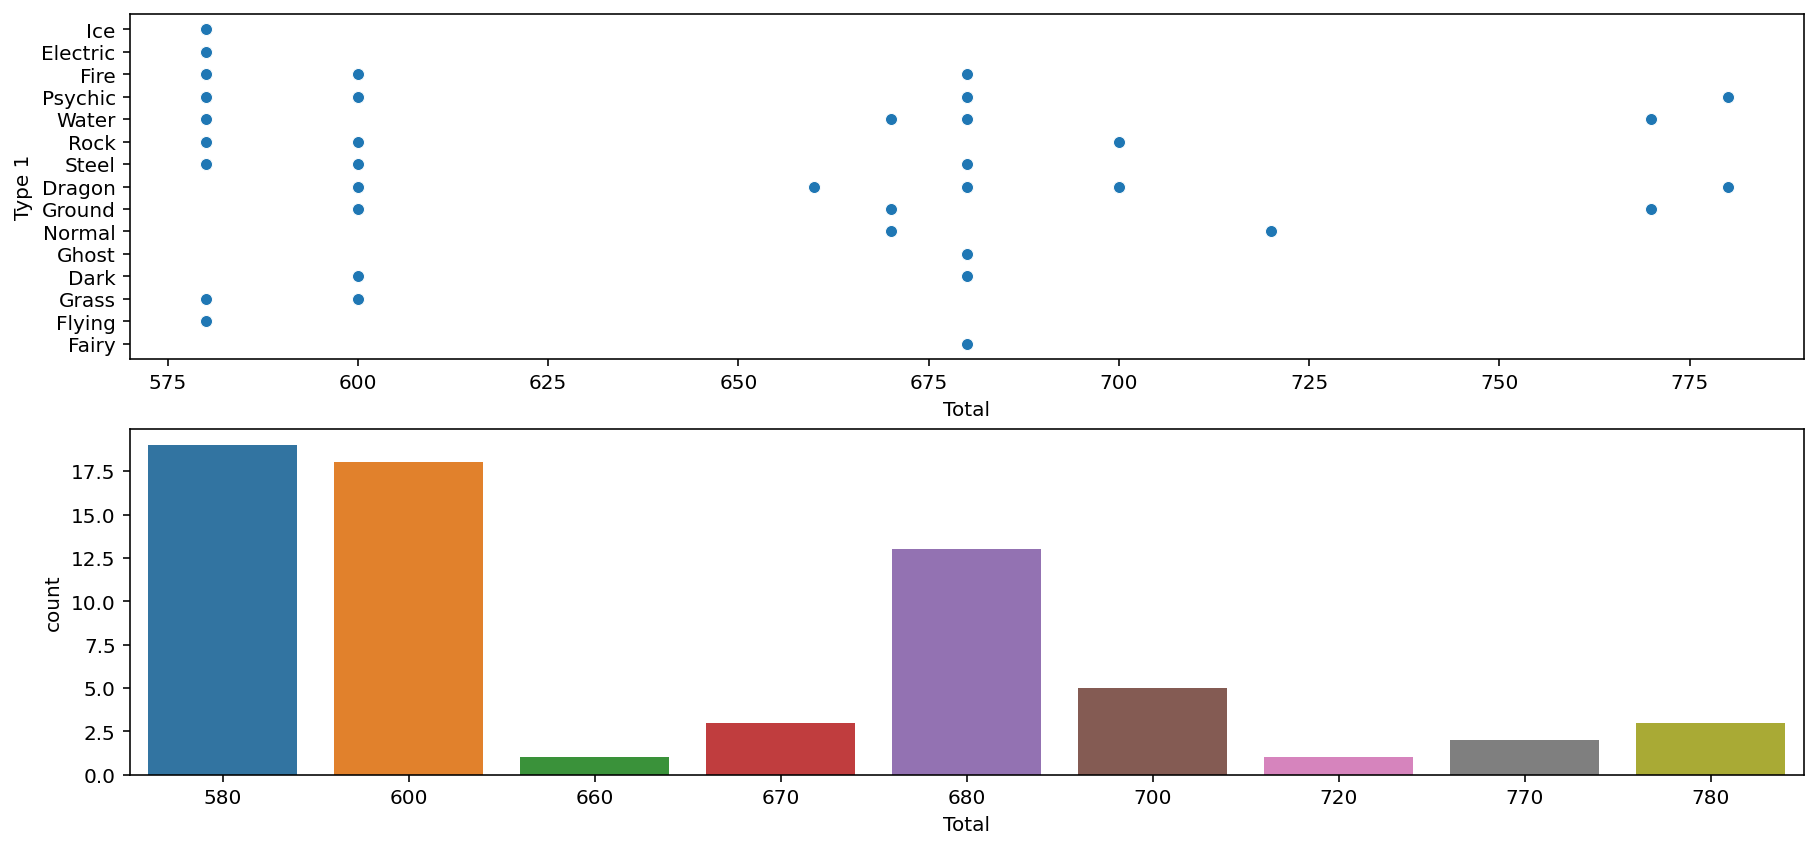

In [18]:
#전설 포켓몬의 Total
plt.figure(figsize=(15, 7)) 

plt.subplot(211)
sns.scatterplot(data = legendary, y = "Type 1", x = "Total")
plt.subplot(212)
sns.countplot(data=legendary, x="Total")
plt.show()
#전설 포켓몬의 Total값은 어느정도 값이 정해져 있다.

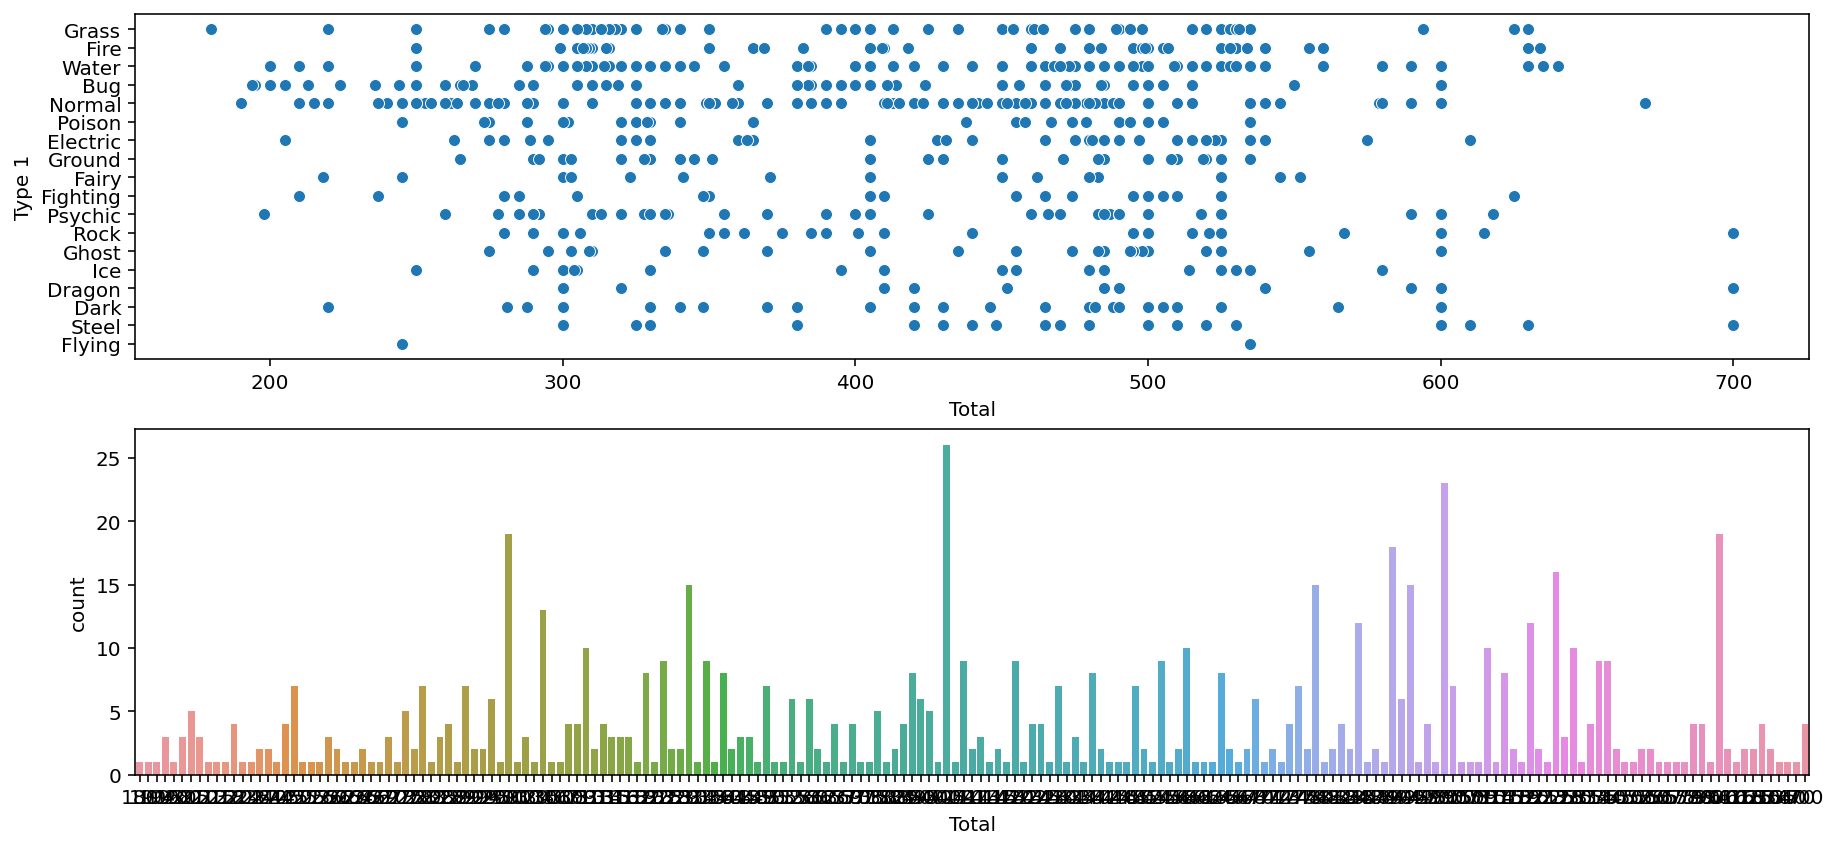

In [19]:
#일반 포켓몬의 Total
plt.figure(figsize=(15, 7)) 

plt.subplot(211)
sns.scatterplot(data = ordinary, y = "Type 1", x = "Total")
plt.subplot(212)
sns.countplot(data = ordinary, x="Total")
plt.show()
#일반 포켓몬은 다양한 분포의 Total값을 가진다.

In [20]:
#특정 단어가 들어가 있는 이름
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names
#이름은 유일한 특성이지만 이름이 비슷한 전설의 포켓몬이 다수 발견된다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [21]:
#전설포켓몬은 이름이 긴 경우가 많다.
legendary["name_count"] = legendary["Name"].apply(lambda i : len(i)) #legendary에 name_count라는 속성을 추가하고 그 내용은 이름의 길이이다.
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [22]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


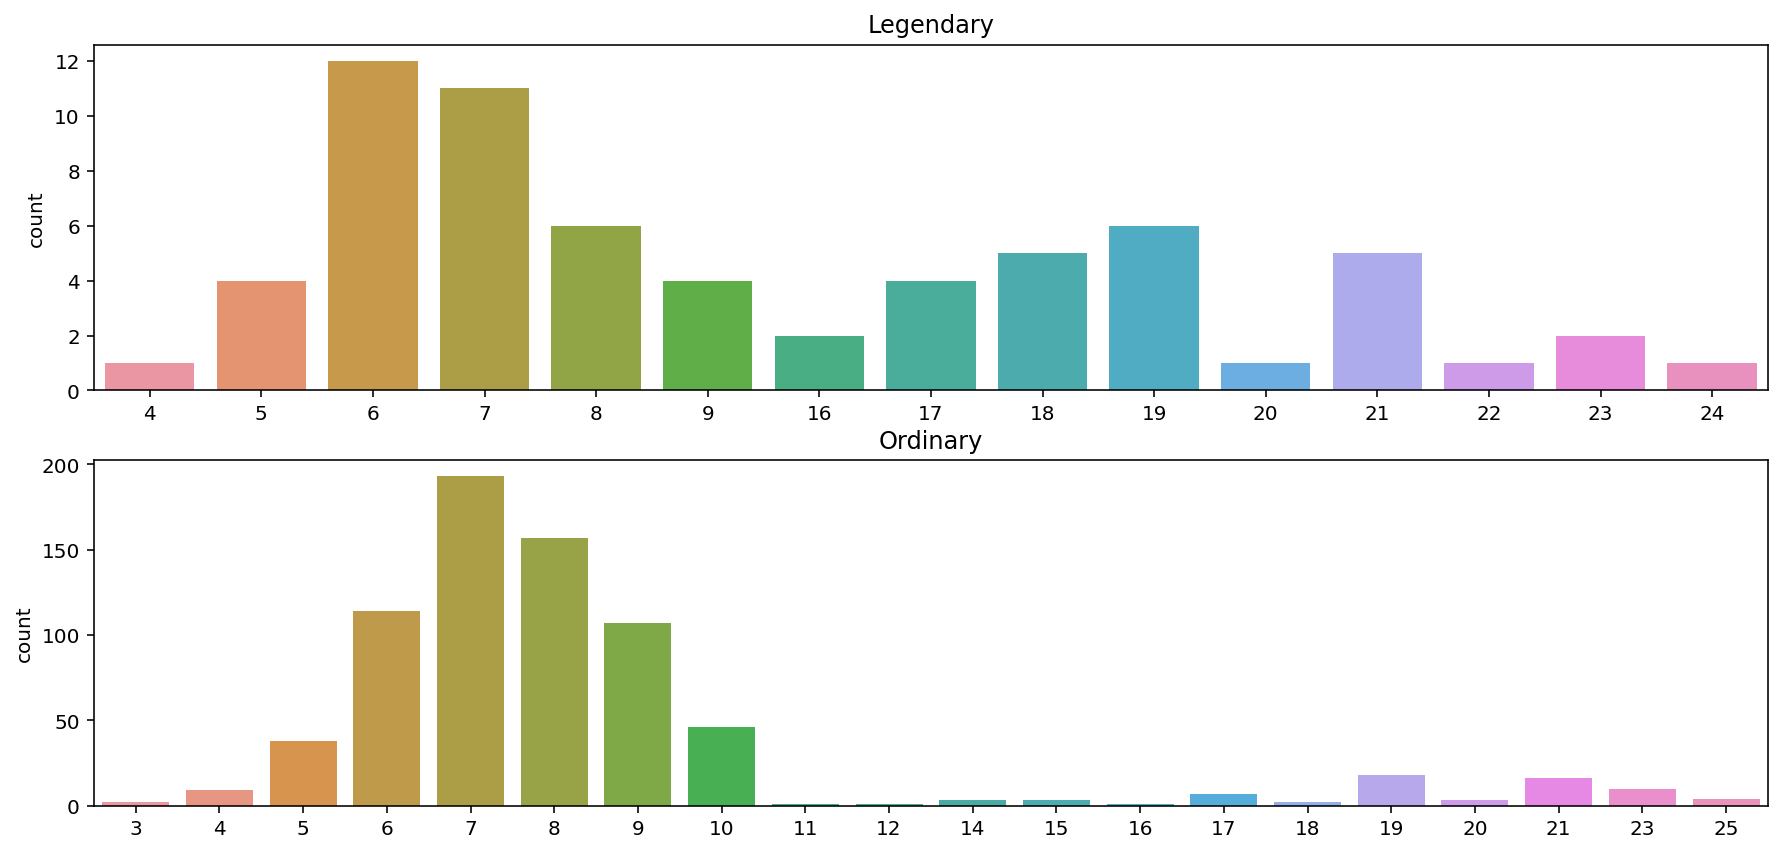

In [23]:
plt.figure(figsize = (15, 7))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()
#그래프를 보면 일반 포켓몬의 긴 이름 비율보다 전설 포켓몬의 긴 이름 비율이 더 높다.

In [24]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%") #전설 포켓몬의 긴 이름 비율
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%") #일반 포켓몬의 긴 이름 비율

41.54 %
15.65 %


In [25]:
#지금부터는 원본을 사용한다
#복사된 데이터셋이 아닌 원본에 "name_count"생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [26]:
#"전처리1 - long_name"속성 추가 (이름의 길이가 10이 넘으면 True, 아니면 False)
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [27]:
#전처리2 - 이름에 알파벳이 아닌 문자가 들어간 경우 False
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", "")) #단 띄워 쓰기 또한 알파벳이 아니여서 False로 출력되므로 모든 띄워쓰기를 제거
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha()) #
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [28]:
#전처리 2에서 걸러진 값들
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [29]:
#데이터의 양이 적기에 직접 변경
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [30]:
#이름 분해(토큰화)
import re

def tokenize(name): #토큰화 함수

    name_split = name.split(" ") #띄워쓰기를 기준으로 토큰화

#반복하여 저장
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name) #A~Z 로 시작하고 a-z로 뒤를 이은 구조로 *은 a-zd의 반복을 나타냄

        tokens.extend(a)
    return np.array(tokens)

#테스트
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [31]:
#전설 포켓몬 토큰화
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)
    
token_set

['Articuno',
 'Zapdos',
 'Moltres',
 'Mewtwo',
 'Mewtwo',
 'Mega',
 'Mewtwo',
 'X',
 'Mewtwo',
 'Mega',
 'Mewtwo',
 'Y',
 'Raikou',
 'Entei',
 'Suicune',
 'Lugia',
 'Ho',
 'Regirock',
 'Regice',
 'Registeel',
 'Latias',
 'Latias',
 'Mega',
 'Latias',
 'Latios',
 'Latios',
 'Mega',
 'Latios',
 'Kyogre',
 'Kyogre',
 'Primal',
 'Kyogre',
 'Groudon',
 'Groudon',
 'Primal',
 'Groudon',
 'Rayquaza',
 'Rayquaza',
 'Mega',
 'Rayquaza',
 'Jirachi',
 'Deoxys',
 'Normal',
 'Forme',
 'Deoxys',
 'Attack',
 'Forme',
 'Deoxys',
 'Defense',
 'Forme',
 'Deoxys',
 'Speed',
 'Forme',
 'Uxie',
 'Mesprit',
 'Azelf',
 'Dialga',
 'Palkia',
 'Heatran',
 'Regigigas',
 'Giratina',
 'Altered',
 'Forme',
 'Giratina',
 'Origin',
 'Forme',
 'Darkrai',
 'Shaymin',
 'Land',
 'Forme',
 'Shaymin',
 'Sky',
 'Forme',
 'Arceus',
 'Victini',
 'Cobalion',
 'Terrakion',
 'Virizion',
 'Tornadus',
 'Incarnate',
 'Forme',
 'Tornadus',
 'Therian',
 'Forme',
 'Thundurus',
 'Incarnate',
 'Forme',
 'Thundurus',
 'Therian',
 'Forme'

In [32]:
#카운터를 사용
from collections import Counter

most_token = Counter(token_set).most_common(10) #가장 많이 쓰인 이름 Top10
most_token

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [33]:
for token, _ in most_token:
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


In [34]:
#전처리3 - 범주형 데이터

#원-핫인코딩
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Grass,Psychic,Ground,Poison,Fairy,Normal,Steel,Bug,Rock,Flying,Water,Electric,Ice,Dragon,Fighting,Ghost,Fire,Dark
0,Grass,Poison,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [35]:
#베이스라인 생성 (베이스라인 모델에 넣을 때 문자열은 빼줘야 한다.---> why?)
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation'] #베이스라인 컬럼
target = 'Legendary'

X = original_data[features] #모델에 넣을 변수 X
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [36]:
y = original_data[target]
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [37]:
#데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [38]:
#모델 학습 시키기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(random_state=25) #의사결정 모델

model.fit(X_train, y_train) #훈련 데이터로 모델학습
y_pred = model.predict(X_test) #테스트 데이터로 예측하여 예측 데이터 생성

confusion_matrix(y_test, y_pred) #테스트 데이터의 정답과 예측 데이터를 비교
# TN FP
# FN TP

#정확도(%) = (옳은 데이터 / 전체 데이터) * 100 에의해 95%의 정확도가 나온다
#높아보이지만 전체 800마리의 포켓몬중에 전부 일반 포켓몬이라고 때려 맞춰도 대충 92%의 정확도가 나온다 ㅋㅋ

array([[144,   3],
       [  5,   8]])

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#recall = TP / (FN + TP)
#recall 값이 낮게 나온다 --> 전설포켓몬을 일반포켓몬으로 인식한다.
#뒤에 돌리고 다시 돌렸더니 올라간 값이 입려되따!

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [43]:
#전처리를 하며 늘어난 컬럼에서 필요 없는 부분을 제외한 특성 만을 사용한다.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

target = "Legendary"

X = pokemon[features]
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
y = pokemon[target]
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [45]:
#모델 학습을 위한 훈련데이터와 테스트데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [46]:
#모델 학습
model = DecisionTreeClassifier(random_state=25) #의사결정 트리
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)) 
#유의미하게 recall 값이 상승했다.

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160

